# Лабораторная работа №4. Синтез КИХ-фильтров.
Лаборатория цифровой обработки сигналов, МФТИ

Вклад задач в итоговую оценку: 1.1-3.2 — 1 балл, 4.1 — 2 балла. Максимальная оценка ограничивается с момента наступления срока сдачи следующей лабораторной работы.

В названии файла заменить `familyname` на свою фамилию. 

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

|      Вариант                                                                  | 1    | 2    | 3    |      4 | 5    | 6    | 7    | 8    | 9    | 10   | 11   | 12   | 13   | 14   | 15   | 16   | 17   | 18   | 19   | 20   |
|:-----------------------------------------------------------------------|:-----|:-----|:-----|:-------|:-----|:-----|:-----|:-----|:-----|:-----|:-----|:-----|:-----|:-----|:-----|:-----|:-----|:-----|:-----|:-----|
| Частота  дискретизации $f_s$, кГц                                      | 100  | 100  | 100  | 100    | 100  | 200  | 200  | 200  | 200  | 200  | 100  | 100  | 100  | 100  | 100  | 200  | 200  | 200  | 200  | 200  |
| Граничная частота полосы пропускания $f_1$, кГц                        | 10   | 9    | 11   |  12    | 15   | 20   | 21   | 23   | 24   | 25   | 9    | 10   | 11   | 12   | 13   | 26   | 27   | 28   | 29   | 30   |
| Граничная частота полосы задерживания $f_2$, кГц                        | 12   | 11   | 13   |  14    | 17   | 22   | 23   | 25   | 26   | 27   | 11   | 12   | 13   | 14   | 15   | 28   | 29   | 30   | 31   | 32   |
| Максимально допустимое отклонение АЧХ в полосе пропускания $\delta_1$  | 0.05 | 0.06 | 0.04 |   0.05 | 0.04 | 0.05 | 0.06 | 0.04 | 0.05 | 0.04 | 0.05 | 0.06 | 0.04 | 0.05 | 0.04 | 0.05 | 0.06 | 0.04 | 0.05 | 0.04 |
| Максимально допустимое отклонение АЧХ в полосе задерживания $\delta_2$ | 0.02 | 0.03 | 0.01 |   0.02 | 0.02 | 0.03 | 0.03 | 0.02 | 0.03 | 0.03 | 0.03 | 0.02 | 0.03 | 0.02 | 0.02 | 0.03 | 0.03 | 0.02 | 0.02 | 0.02 |
| Несущая частота $f_0$, кГц                                             | 3,9  | 3,8  | 3,9  |   4    | 4,6  | 5,9  | 6,5  | 6,7  | 8,1  | 7,4  | 4,5  | 5,1  | 4,3  | 5,2  | 5,3  | 5,7  | 8,2  | 9,1  | 8,7  | 9,5  |

In [7]:
fs = 100 * 1_000
f1 = 13 * 1_000
f2 = 15 * 1_000
delta_p = 0.04
delta_s = 0.02
f0 = 5.3 * 1_000

fc = (f1 + f2)/2
N = 29
fk = np.arange(N) * fs / N

# Модуль 1. Метод частотной выборки синтеза КИХ-фильтров

## Задача 1.1. Синтез ФНЧ по идеальной АЧХ. 

Синтезировать КИХ-фильтр 28 порядка ($N=29$) на основе идеального фильтра нижних частот с частотой среза $f_c=(f_1+f_2)/2$ методом частотной выборки. Частоту дискретизации принять равной $f_s$.

а) Определить максимальные уровни пульсаций $\delta_1$ и $\delta_2$ в полосе пропускания и в полосе задерживания. 

б) Изобразить на одном графике АЧХ фильтра и отсчеты ДПФ. 

в) Построить импульсную характеристику КИХ-фильтра. Определить по виду импульсной характеристики, будет ли фильтр обладать постоянной фазовой и группой задержками.

г) Получить график для групповой задержки фильтра. Сравнить с выводом в пункте (в).

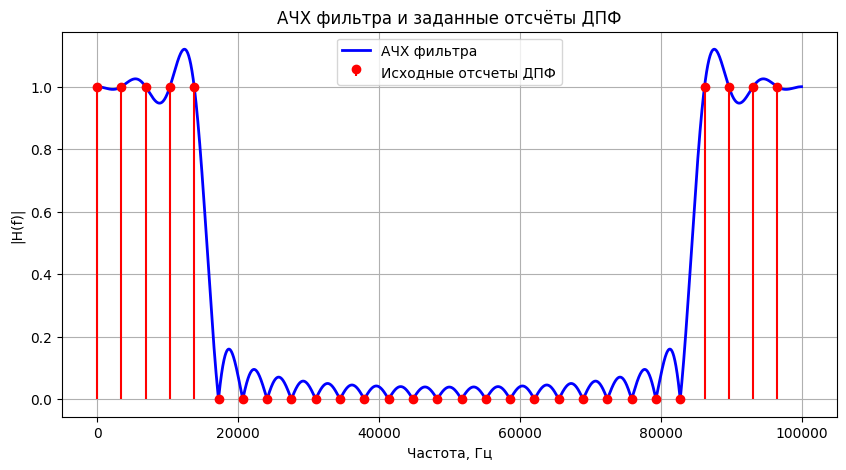

In [8]:
Hk = np.where((fk < fc) | (fs - fc < fk), 1, 0)
hn = np.fft.fftshift(np.fft.ifft(Hk).real)

fresp, Hresp = signal.freqz(hn, worN=4096, fs=fs, whole=True)

plt.figure(figsize=(10,5))
plt.plot(fresp, abs(Hresp), 'b', lw=2, label='АЧХ фильтра')
plt.stem(fk, Hk, 'r',
         markerfmt='ro', basefmt=' ', label='Исходные отсчеты ДПФ')
plt.xlabel('Частота, Гц'); plt.ylabel('|H(f)|')
plt.title('АЧХ фильтра и заданные отсчёты ДПФ')
plt.legend()
plt.grid(True)

In [9]:
idx_pass = (fresp <= f1) | (fresp >= fs - f1)
idx_stop = (fresp >= f2) & (fresp <= fs - f2)

actual_delta_p = np.max(np.abs(abs(Hresp[idx_pass])-1))
actual_delta_s = np.max(np.abs(Hresp[idx_stop]))

In [10]:
f'{actual_delta_p:.4f}'

'0.1199'

In [11]:
f'{actual_delta_s:.4f}'

'0.6866'

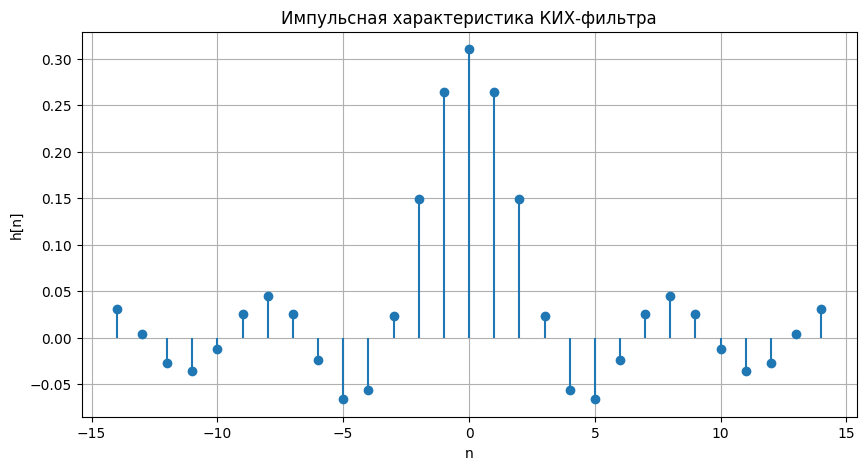

In [12]:
plt.figure(figsize=(10,5))
n = np.arange(-(N-1)//2, (N-1)//2 + 1)
plt.stem(n, hn, basefmt=' ')
plt.xlabel('n'); plt.ylabel('h[n]')
plt.title('Импульсная характеристика КИХ-фильтра')
plt.grid(True)

Т.к. импульская характеристика симметричная, то фильтр обладает постоянной фазовой и групповой задержками.

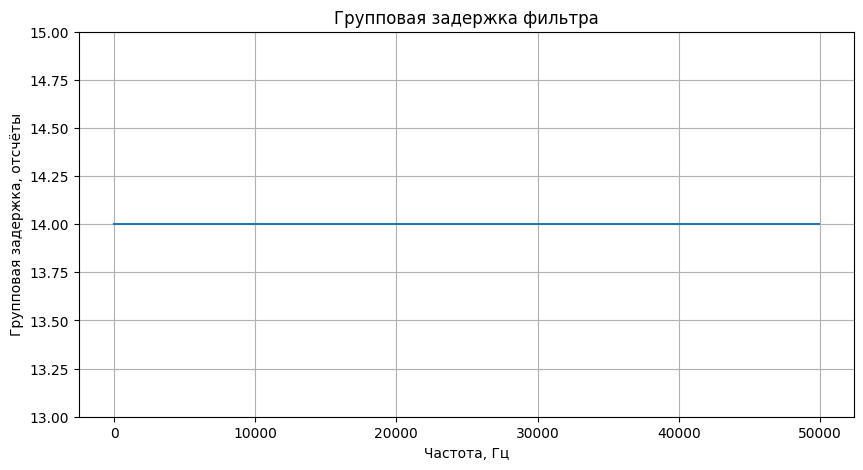

In [13]:
w, gd = signal.group_delay((hn, 1), fs=fs)

plt.figure(figsize=(10,5))
plt.plot(w, gd)
plt.xlabel('Частота, Гц')
plt.ylabel('Групповая задержка, отсчёты')
plt.ylim(min(gd) - 1, max(gd) + 1)
plt.title('Групповая задержка фильтра')
plt.grid(True)

## Задача 1.2. Синтез ФНЧ по непрерывной АЧХ.

Синтезировать КИХ-фильтр 28 порядка ($N=29$) на основе идеального фильтра нижних частот с граничной частотой полосы пропускания $f_1$ и с граничной частотой полосы задерживания $f_2$ методом частотной выборки. Частоту дискретизации принять равной $f_s$. Частотную характеристику идеального фильтра в полосе перехода аппроксимировать линейной функцией так, чтобы характеристика была непрерывной.

а) Определить максимальные уровни пульсаций $\delta_1$ и $\delta_2$ в полосе пропускания и в полосе задерживания. Сравнить с результатом в задаче 1.1.

б) Изобразить на одном графике АЧХ фильтра и отсчеты ДПФ. 

в) Построить импульсную характеристику полученного КИХ-фильтра. Определить по виду импульсной характеристики, будет ли 
фильтр обладать постоянной фазовой и группой задержками.

г) Получить график для групповой задержки фильтра. Сравнить с выводом в пункте (в).

д) Определить частоту среза (по уровню $-3$ дБ) модельного и полученного фильтров. 

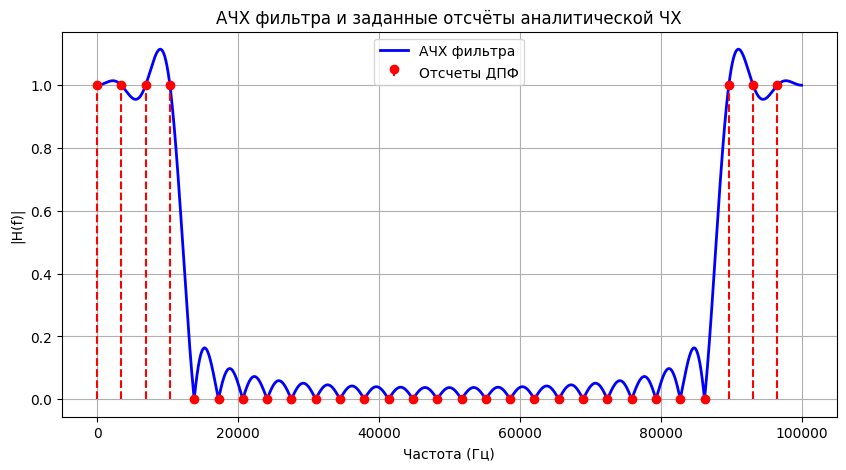

In [14]:
@np.vectorize
def H_ideal(f):
    if f <= f1 or fs - f1 <= f <= fs:
        return 1
    elif f1 < f < f2:
        return 1 - (f - f1) / (f2 - f1)
    elif fs - f2 < f < fs - f1:
        return 1 - (f - fs + f1) / (f1 - f2)
    else:
        return 0

Hk = H_ideal(fk)
hn = np.fft.fftshift(np.fft.ifft(Hk).real)
f_resp, H_resp = signal.freqz(hn, worN=4096, fs=fs, whole=True)

plt.figure(figsize=(10,5))
plt.plot(f_resp, abs(H_resp), 'b', lw=2, label='АЧХ фильтра')
plt.stem(fk, Hk, 'r', markerfmt='ro', basefmt=' ', linefmt='r--', label='Отсчеты ДПФ')
plt.xlabel('Частота (Гц)'); plt.ylabel('|H(f)|')
plt.title('АЧХ фильтра и заданные отсчёты аналитической ЧХ')
plt.legend()
plt.grid(True)

In [15]:
idx_pass = (f_resp <= f1) | (f_resp >= fs - f1)
idx_stop = (f_resp >= f2) & (f_resp <= fs - f2)

actual_delta_p = np.max(np.abs(abs(H_resp[idx_pass])-1))
actual_delta_s = np.max(np.abs(H_resp[idx_stop]))

In [16]:
f'{actual_delta_p:.4f}'

'0.7813'

In [17]:
f'{actual_delta_s:.4f}'

'0.1635'

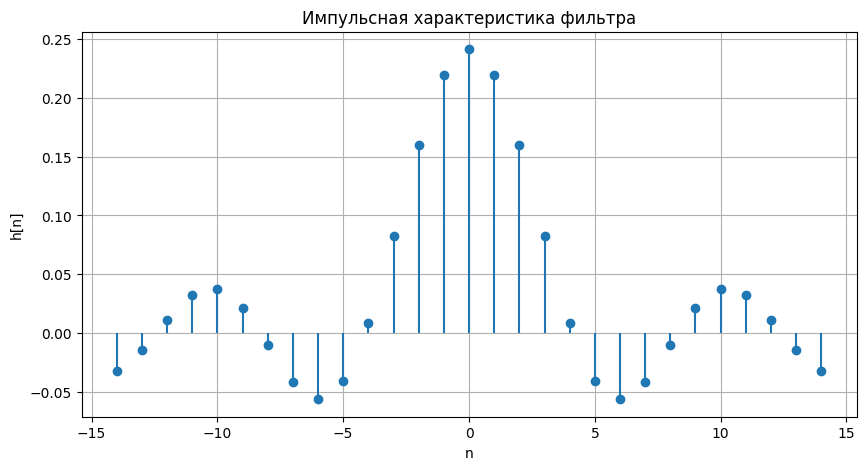

In [18]:
plt.figure(figsize=(10,5))
n = np.arange(-(N-1)//2, (N-1)//2 + 1)
plt.stem(n, hn, basefmt=' ')
plt.xlabel('n'); plt.ylabel('h[n]')
plt.title('Импульсная характеристика фильтра')
plt.grid(True)

Импульсная характеристика симметрична, следовательно фильтр имеет постоянные групповую и фазовую задержки.

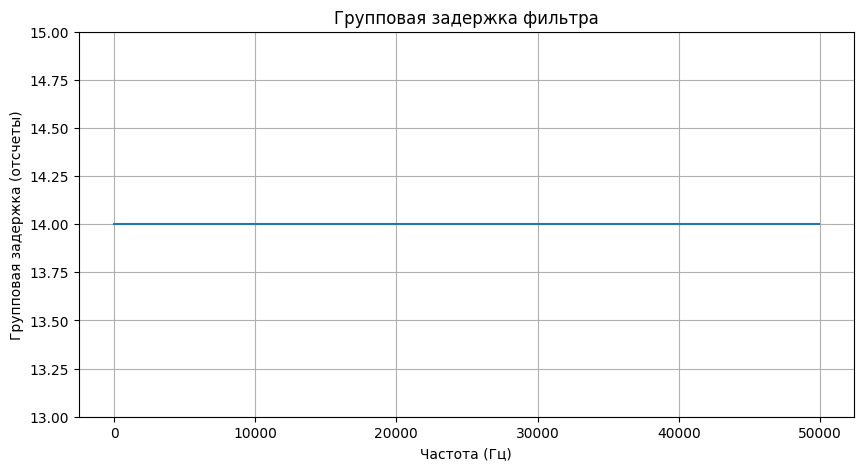

In [19]:
freq_gd, gd = signal.group_delay((hn,1), fs=fs)

plt.figure(figsize=(10,5))
plt.plot(freq_gd, gd)
plt.xlabel('Частота (Гц)')
plt.ylabel('Групповая задержка (отсчеты)')
plt.ylim(min(gd) - 1, max(gd) + 1)
plt.title('Групповая задержка фильтра')
plt.grid(True)

In [20]:
H_abs = np.abs(H_resp)
H_max = np.max(H_abs)
idx_minus3db = np.argmin(np.abs(H_abs - H_max/np.sqrt(2)))
freq_minus3db = fresp[idx_minus3db]

In [21]:
f'{freq_minus3db:.2f}'

'11254.88'

Для частоты среза модельного фильтра верно $1 - (f - f1) / (f2 - f1) = 0.707$. Следовательно, $f = f1 + (1 - 0.707) \cdot (f2 - f1) = 10586$ Гц

## Задача 1.3. Синтез фильтра с характеристикой «приподнятый косинус»

Синтезировать КИХ-фильтр 28 порядка ($N=29$) с частотой среза $f_c=(f_1+f_2)/2$  на основе фильтра приподнятого косинуса методом частотной выборки. Частоту дискретизации принять равной $f_s$. На интервале $[-f_s/2, f_s/2]$ частотная характеристика фильтра задается следующим образом 

$$H(f)=\left\{ \begin{matrix}
   1, & |f| < (1-\beta)f_c;\\
   \dfrac{1}{2}*\left( 1+\cos \left(\pi \dfrac{|f|-(1-\beta)f_c}{2\beta f_c} \right) \right), & (1-\beta) f_c \le |f| \le (1+\beta)f_c;  \\
   0,   &  |f| > (1+\beta)f_c. \\
\end{matrix} \right.$$

а) Подобрать такое $\beta$, чтобы модельный фильтр не выходил за максимально допустимые отклонения АЧХ в полосе пропускания и в полосе задерживания ($\delta_1$ и $\delta_2$). Изобразить полученную АЧХ фильтра.

б) Для синтезированного фильтра определить максимальные уровни пульсаций $\delta_1$ и $\delta_2$ в полосе пропускания и в полосе задерживания. Сравнить с результатами в задаче 1.1 и задаче 1.2.

в) Изобразить на одном графике АЧХ фильтра и отсчеты ДПФ. 

г) Построить импульсную характеристику полученного КИХ-фильтра. Определить по виду импульсной характеристики, будет ли 
фильтр обладать постоянной фазовой и группой задержками.

д) Получить график для групповой задержки фильтра. Сравнить с выводом в пункте (г).

е) Определить частоту среза (по уровню $-3$ дБ) полученного фильтра. Сравнить с задачей 1.2.


In [22]:
@np.vectorize
def H_ideal(f, fc, b): 
    if f <= (1 - b) * fc or f >= fs - (1 - b) * fc:
        return 1.0
    elif f <= (1 + b) * fc:
        return 0.5 * (1 + np.cos(np.pi * (f - (1 - b) * fc) / (2 * b * fc)))
    elif f >= fs - (1 + b) * fc:
        return 0.5 * (1 + np.cos(np.pi * (fs - f - (1 - b) * fc) / (2 * b * fc)))
    else:
        return 0

def check_real_filter(h, fs, f1, f2, delta_p, delta_s):
    w, H = signal.freqz(h, worN=4096, fs=fs, whole=True)
    passband = (w <= f1) | (w >= fs - f1)
    stopband = (w >= f2) & (w <= fs - f2)

    H_abs = np.abs(H)
    delta_p_real = np.max(np.abs(H_abs[passband] - 1))
    delta_s_real = np.max(H_abs[stopband])

    meet_reqs = (delta_p_real <= delta_p) and (delta_s_real <= delta_s)
    return meet_reqs, delta_p_real, delta_s_real

b_values = np.linspace(0.01, 1, 100)
optimal_b = None
min_product = 100000
meets = False
for b in b_values:
    Hk = H_ideal(fk, fc, b)
    h = np.fft.ifft(Hk).real

    meets, delta_p_real, delta_s_real = check_real_filter(h, fs, f1, f2, delta_p, delta_s)
    
    if delta_p_real * delta_s_real < min_product:
        min_product = delta_p_real * delta_s_real
        optimal_b = b
        h_optimal = h.copy()
        
    if meets:
        optimal_b = b
        h_optimal = h.copy()
        break

optimal_b, min_product

(np.float64(1.0), np.float64(0.6385515446575))

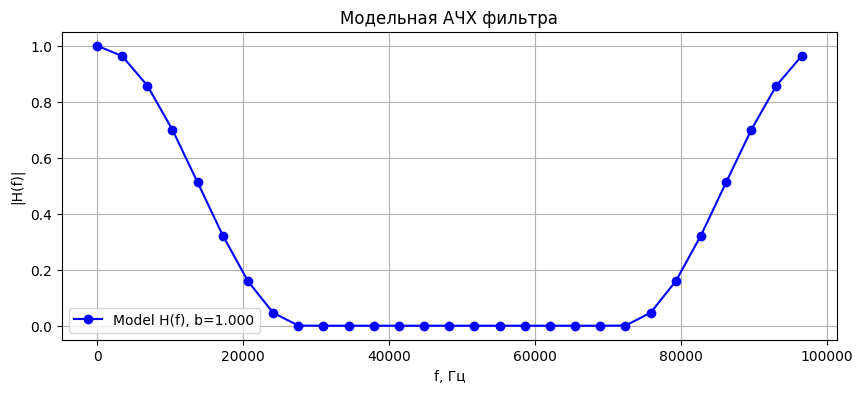

In [23]:
Hk = H_ideal(fk, fc, optimal_b)

plt.figure(figsize=(10,4))
plt.plot(fk, Hk, 'bo-', label=f'Model H(f), b={optimal_b:.3f}')
plt.xlabel('f, Гц'); plt.ylabel('|H(f)|'); plt.grid(True)
plt.title('Модельная АЧХ фильтра')
plt.legend()

In [24]:
f_resp, H_resp = signal.freqz(h_optimal, worN=4096, fs=fs, whole=True)
H_abs = np.abs(H_resp)

idx_pass = (f_resp <= f1) | (f_resp >= fs - f1)
idx_stop = (f_resp >= f2) & (f_resp <= fs - f2)
actual_delta_p = np.max(np.abs(abs(H_resp[idx_pass])-1))
actual_delta_s = np.max(np.abs(H_resp[idx_stop]))
actual_delta_p, actual_delta_s

(np.float64(0.81196714544646), np.float64(0.7864253476738797))

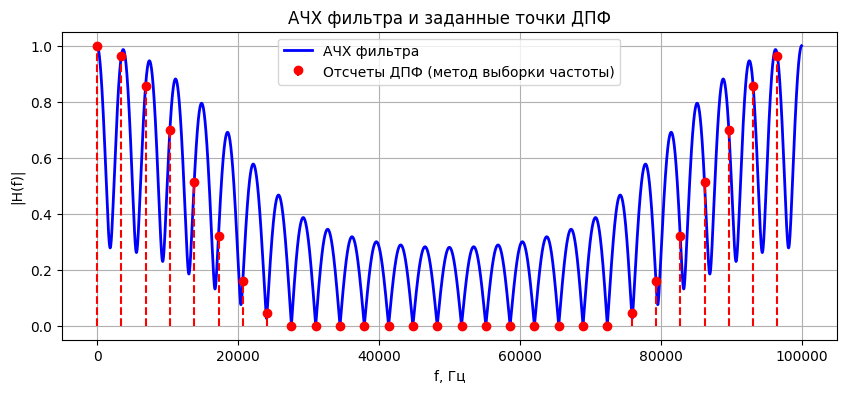

In [25]:
plt.figure(figsize=(10,4))
plt.plot(f_resp, H_abs, 'b-', linewidth=2, label='АЧХ фильтра')
plt.stem(fk, Hk, 'r', markerfmt='ro', basefmt=' ', linefmt='r--', label='Отсчеты ДПФ (метод выборки частоты)')
plt.xlabel('f, Гц'); plt.ylabel('|H(f)|'); plt.grid(True)
plt.title('АЧХ фильтра и заданные точки ДПФ')
plt.legend()

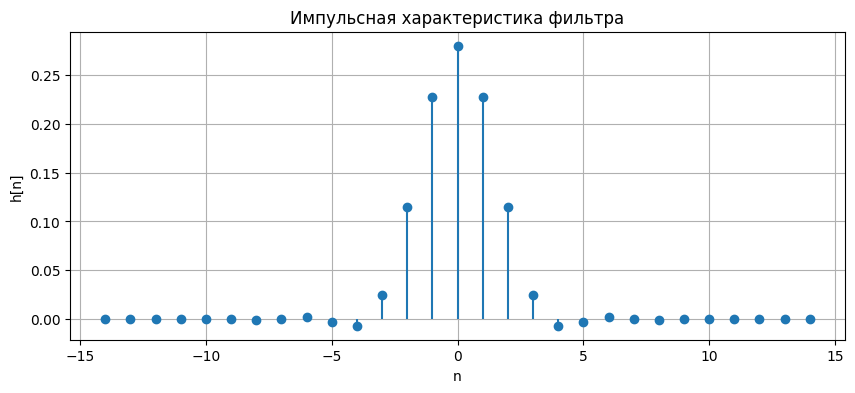

In [26]:
plt.figure(figsize=(10,4))
n = np.arange(-(N-1)//2, (N-1)//2 + 1)
plt.stem(n, np.fft.fftshift(h_optimal), basefmt=' ')
plt.title('Импульсная характеристика фильтра')
plt.xlabel('n')
plt.ylabel('h[n]')
plt.grid(True)

Импульсная характеристика, следовательно групповая и фазовая задержки постоянные

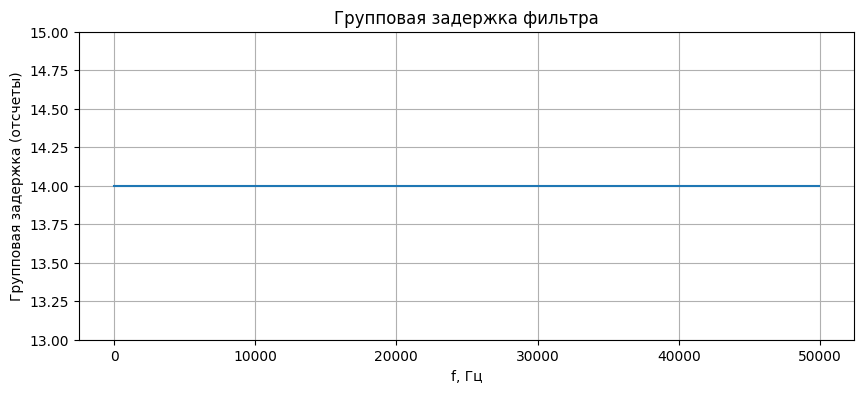

In [27]:
freq_gd, gd = signal.group_delay((hn, 1), fs=fs)
plt.figure(figsize=(10,4))
plt.plot(freq_gd, gd)
plt.xlabel('f, Гц')
plt.ylabel('Групповая задержка (отсчеты)')
plt.ylim(min(gd) - 1, max(gd) + 1)
plt.title('Групповая задержка фильтра')
plt.grid(True)

In [28]:
H_max = np.max(H_abs)
idx_3db = np.argmin(np.abs(H_abs - H_max/np.sqrt(2)))
freq_3db = f_resp[idx_3db]
f'{freq_3db:.2f}'

'2758.79'

#  Модуль 2. Метод окон для синтеза КИХ-фильтров

### Задача 2.1. Сравнение АЧХ фильтров одного порядка 
Синтезировать КИХ-фильтры нижних частот c частотой среза $f_c$ при частоте дискретизации $f_s$ порядка $R=28$ ($N=29$) с использованием следующих окон:

* прямоугольное (окно Дирихле)
$$w[k]=\left\{ \begin{matrix}
   1,  \\
   0,  \\
\end{matrix}\begin{matrix}
   \ \ 0\le k\le N-1;  \\
   \left\{ k<0 \right\}\cup \left\{ k\ge N \right\}.  \\
\end{matrix} \right.$$

* окно Ханна 
$$w[k]=\left\{ \begin{matrix}
   0,5-0,5\cos \dfrac{2\pi k}{N-1}, & 0\le k\le N-1;  \\
   0, &\left\{ k<0 \right\}\cup \left\{ k\ge N \right\}. \\
\end{matrix} \right.$$

* окно Хэмминга
$$w[k]=\left\{ \begin{matrix}
   0,54-0,46\cos \dfrac{2\pi k}{N-1}, & 0\le k\le N-1;  \\
   0, &\left\{ k<0 \right\}\cup \left\{ k\ge N \right\}. \\
\end{matrix} \right.$$

* окно Блэкмана
$$w[k]=\left\{ \begin{matrix}
   0,42-0,5\cos \dfrac{2\pi k}{N-1}+0,08\cos \dfrac{4\pi k}{N-1}, & 0\le k\le N-1;  \\
   0, &\left\{ k<0 \right\}\cup \left\{ k\ge N \right\}. \\
\end{matrix} \right.$$

Построить графики оконной функции $w[k]$, импульсной характеристики КИХ-фильтра $h[k]$, АЧХ КИХ-фильтра(в линейном масштабе и в дБ). Определить по графикам максимальный уровень пульсаций по полосе задерживания в дБ. Заполнить таблицу. Частоту среза определять по уровню -3дБ.

Окно: Прямоугольное (Дирихле)
Частота среза (-3 дБ): 13354.49 Гц
Макс. уровень подавления в полосе задерживания: -28.02 дБ

Окно: Ханн
Частота среза (-3 дБ): 12451.17 Гц
Макс. уровень подавления в полосе задерживания: -44.01 дБ

Окно: Хэмминг
Частота среза (-3 дБ): 12585.45 Гц
Макс. уровень подавления в полосе задерживания: -50.97 дБ

Окно: Блэкман
Частота среза (-3 дБ): 12158.20 Гц
Макс. уровень подавления в полосе задерживания: -38.05 дБ



,Окно,"Частота среза (-3дБ), Гц","Макс. уровень в полосе задерживания, дБ"
0,Прямоугольное (Дирихле),13354.49,-28.02
1,Ханн,12451.17,-44.01
2,Хэмминг,12585.45,-50.97
3,Блэкман,12158.20,-38.05


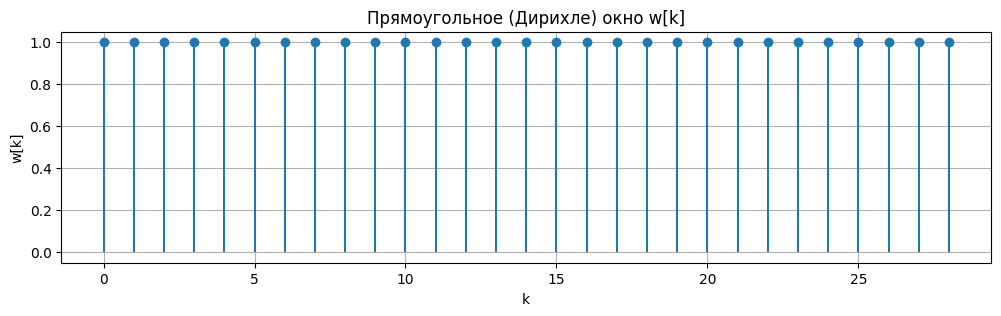

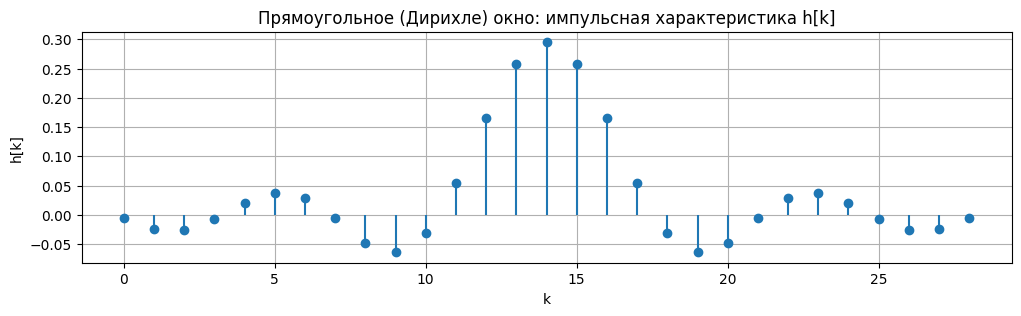

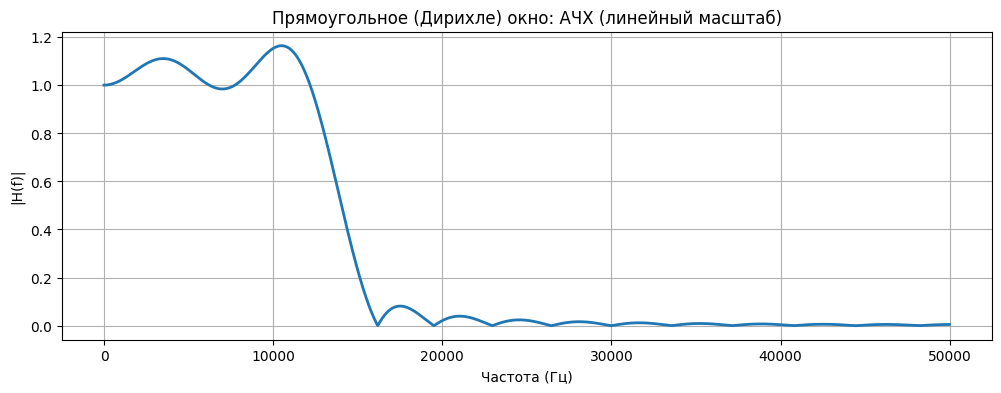

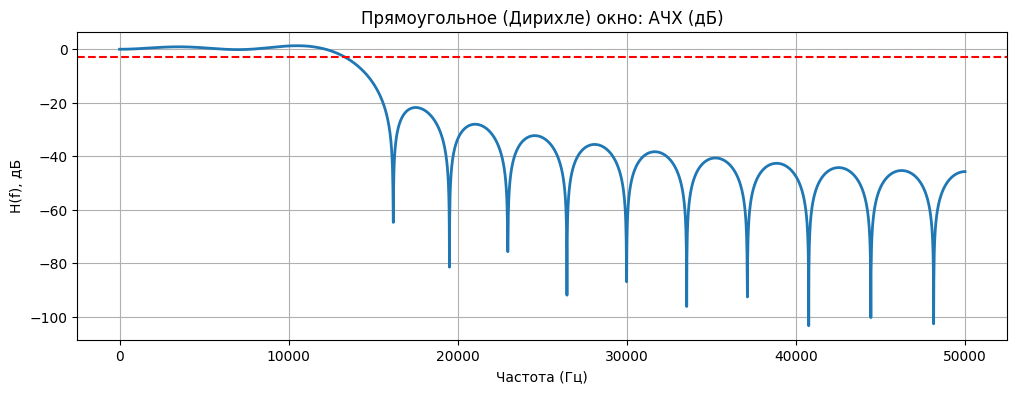

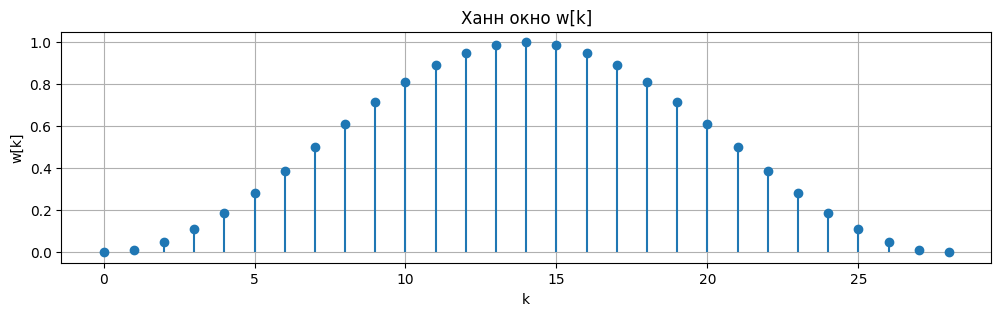

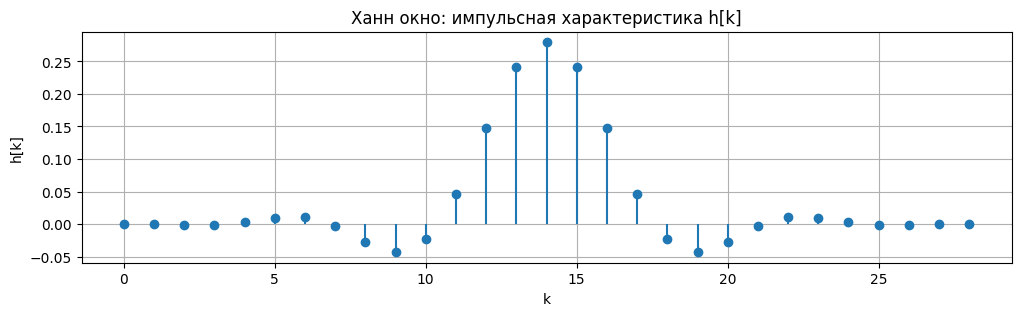

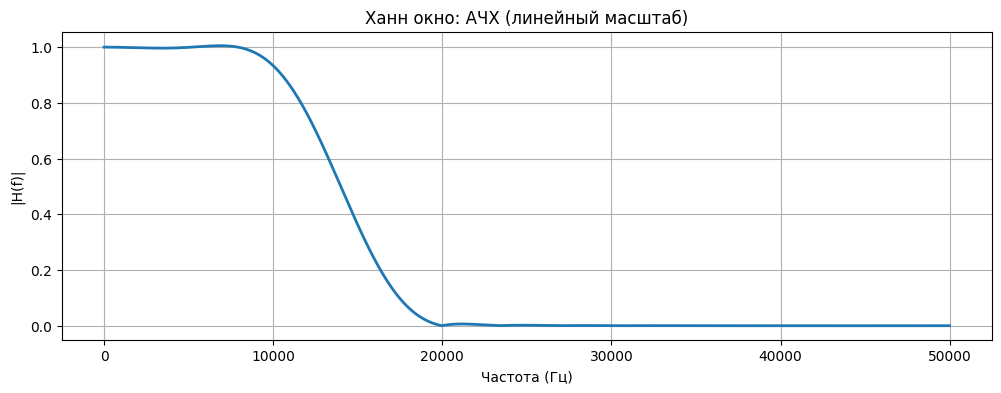

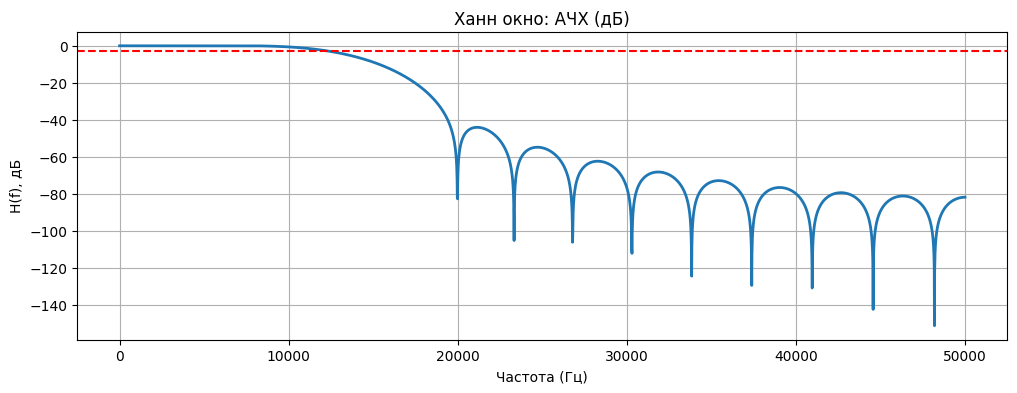

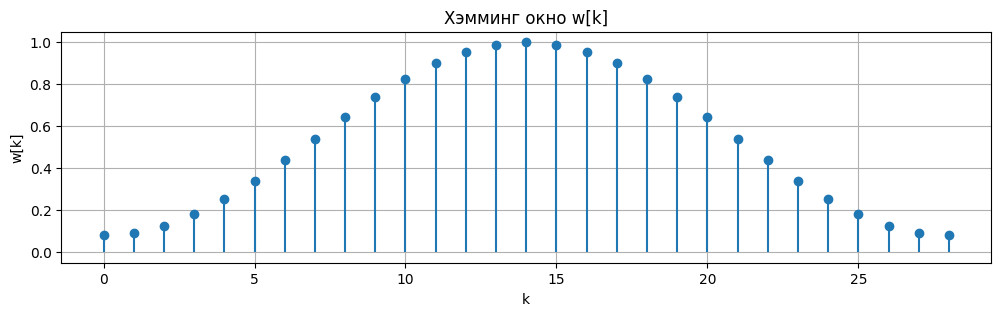

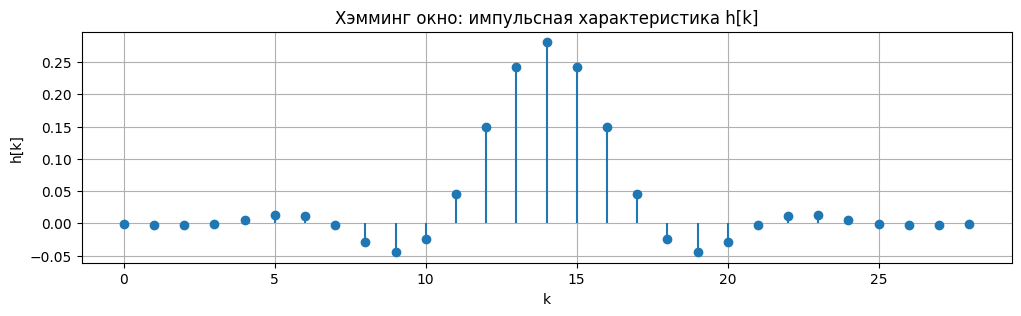

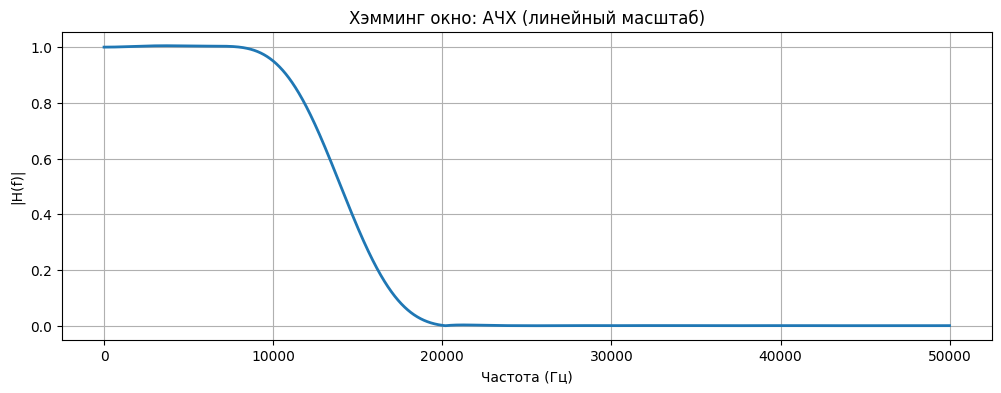

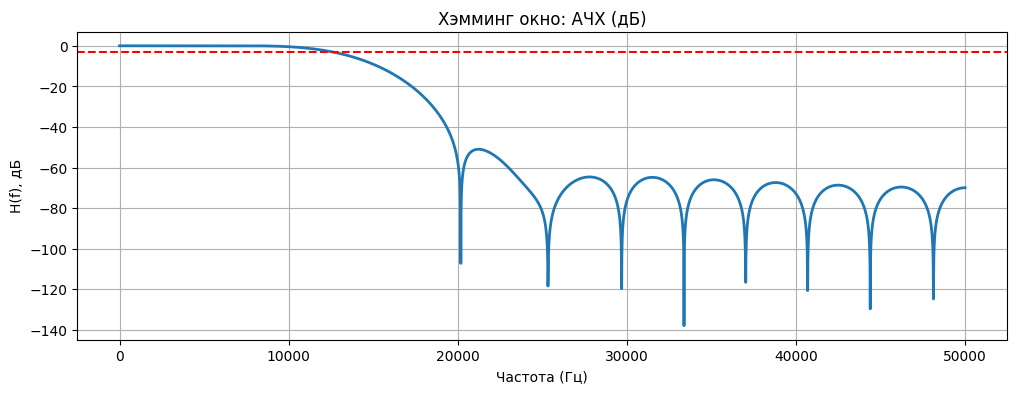

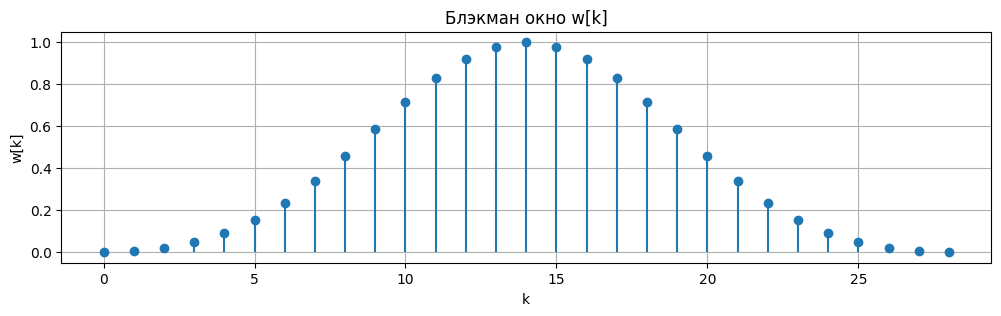

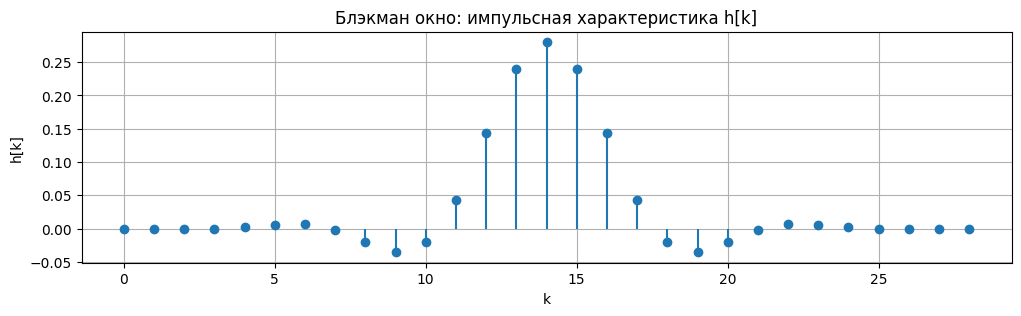

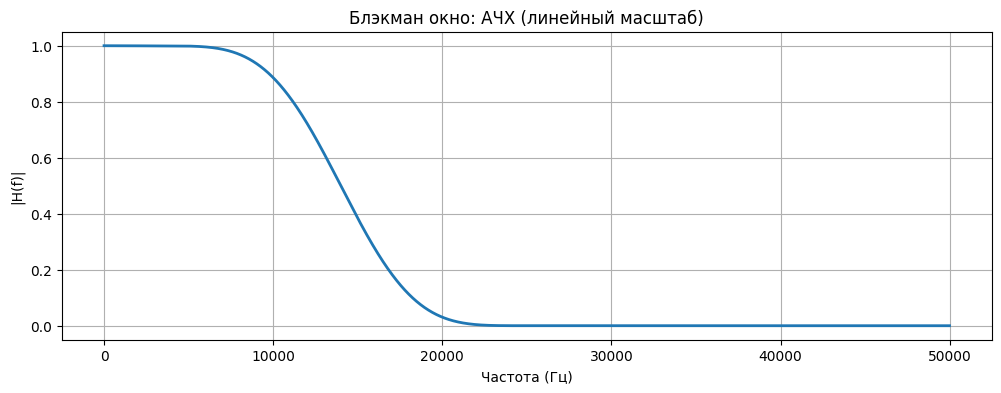

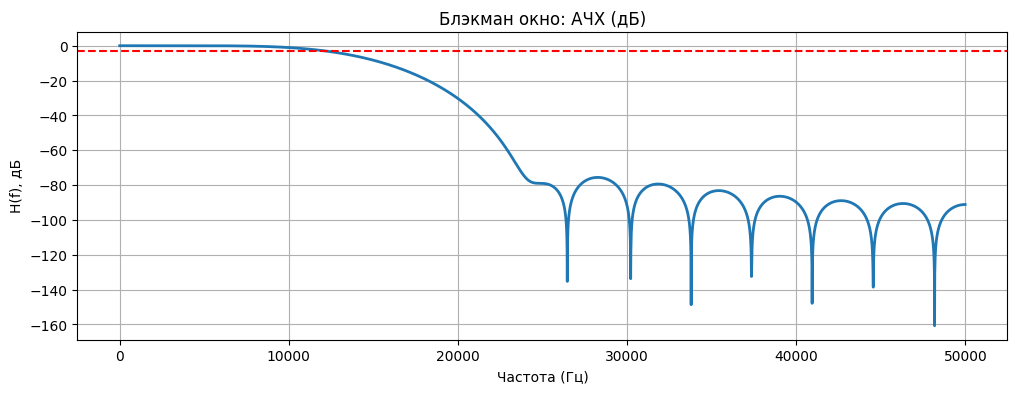

In [29]:
windows = {
    'Прямоугольное (Дирихле)': 'boxcar',
    'Ханн': 'hann',
    'Хэмминг': 'hamming',
    'Блэкман': 'blackman'
}

results = []

for window_name, window_type in windows.items():
    h = signal.firwin(numtaps=N, cutoff=fc, window=window_type, fs=fs)

    w = signal.get_window(window_type, N, fftbins=False)

    f, H = signal.freqz(h, worN=4096, fs=fs)
    H_dB = 20 * np.log10(np.abs(H))

    plt.figure(figsize=(12, 3))
    plt.stem(np.arange(N), w, basefmt=' ')
    plt.title(f'{window_name} окно w[k]')
    plt.xlabel('k'); plt.ylabel('w[k]')
    plt.grid()

    plt.figure(figsize=(12, 3))
    plt.stem(np.arange(N), h, basefmt=' ')
    plt.title(f'{window_name} окно: импульсная характеристика h[k]')
    plt.xlabel('k'); plt.ylabel('h[k]')
    plt.grid()

    plt.figure(figsize=(12, 4))
    plt.plot(f, np.abs(H), linewidth=2)
    plt.title(f'{window_name} окно: АЧХ (линейный масштаб)')
    plt.xlabel('Частота (Гц)'); plt.ylabel('|H(f)|')
    plt.grid()

    plt.figure(figsize=(12, 4))
    plt.plot(f, H_dB, linewidth=2)
    plt.title(f'{window_name} окно: АЧХ (дБ)')
    plt.xlabel('Частота (Гц)'); plt.ylabel('H(f), дБ')
    plt.grid()
    plt.axhline(-3, color='red', linestyle='--')

    H_max = np.max(np.abs(H))
    idx_3dB = np.argmax(H_dB <= -3)
    cutoff_freq = f[idx_3dB]

    stopband_start = int(len(f)*(fc*1.5)/(fs/2))
    stopband_level_dB = np.max(H_dB[stopband_start:])

    print(f'Окно: {window_name}')
    print(f'Частота среза (-3 дБ): {cutoff_freq:.2f} Гц')
    print(f'Макс. уровень подавления в полосе задерживания: {stopband_level_dB:.2f} дБ\n')

    results.append({
        'Окно': window_name,
        'Частота среза (-3дБ), Гц': round(cutoff_freq, 2),
        'Макс. уровень в полосе задерживания, дБ': round(stopband_level_dB, 2)
    })

df = pd.DataFrame(results)
df

### Задача 2.2. Синтез ФНЧ с окном Хемминга. 

Синтезировать КИХ-фильтр нижних частот с окном Хемминга наименьшего порядка при заданных требованиях к АЧХ:
* частота дискретизации $f_s$,
* граничная частота полосы пропускания $f_1$,
* граничная частота полосы задерживания $f_2$,
* максимально допустимое отклонение АЧХ в полосе пропускания $\delta_1$,
* максимально допустимое отклонение АЧХ в полосе задерживания $\delta_2$.

Воспользоваться следующей итерационной процедурой [1]:

1) Оценить длину окна по формуле 

$$\hat{N}=\left[\dfrac{3,3 f_s}{\Delta f} \right], \;\;  \Delta f=f_2-f_1$$

2) Взвесить импульсную характеристику идеального фильтра c ФЧХ $\varphi(\theta)=- \dfrac{R}{2} \theta$ окном Хэмминга выбранной длины (``scipy.firwin``, $f_c=(f_1+f_2)/2$).

$$h[k]=\left\{ \begin{matrix}
   {{h}_{\text{ideal}}}[k]w[k],  \\
   0,  \\
\end{matrix}\begin{matrix}
   \ \ 0\le k\le N-1;  \\
   \left\{ k<0 \right\}\cup \left\{ k\ge N \right\}.  \\
\end{matrix} \right.$$

$$w[k]=\left\{ \begin{matrix}
   0,54-0,46\cos \dfrac{2\pi k}{N-1}, & 0\le k\le N-1;  \\
   0, &\left\{ k<0 \right\}\cup \left\{ k\ge N \right\}. \\
\end{matrix} \right.$$

3) Проверить выполнение требований к АЧХ фильтра. Если требования не выполняются, следует увеличить порядок фильтра $R$ (на некоторое целое число) и перейти на п. 2. Если требования выполняются, то нужно уменьшить порядок фильтра  $R$ и перейти на п. 2. Уменьшение и увеличение порядка производится до тех пор, пока не будет найден минимальный порядок , при котором выполняются требования к АЧХ и уменьшение порядка на единицу приводит к нарушению требований к фильтру. 

Проверку требований к АЧХ можно произвести по графику, используя
* backend notebook `%matplotlib notebook` (в Jupyter Notebook)
* `plt.xlim()` и `plt.ylim()` (в Google Colab или в Jupyter Notebook)

Приведите графики АЧХ КИХ-фильтра с начальным ($\hat{R}=\hat{N}-1$) и конечным $R_\min$ порядками в итерационной процедуре. 
______

[1] Солонина, А. И. Цифровая обработка сигналов в зеркале MATLAB : учебное пособие / А. И. Солонина .— Санкт-Петербург : БХВ-Петербург, 2021 .— 560 с. — (Учебная литература для вузов).

P.S. Есть в библиотеке МФТИ. 
______

$$ \hat{N} = \left[ \dfrac{3.3 \cdot 10^5}{\left(15 - 13\right) \cdot 10^3}\right] = 165 $$

In [30]:
delta_f = (f2 - f1)
N_hat = int(np.ceil((3.3 * fs) / delta_f))
if N_hat % 2 == 0:
    N_hat += 1
R_hat = N_hat - 1
R_hat

164

In [31]:
def check_requirements(h, fs, f1, f2, delta_p, delta_s):
    f, H = signal.freqz(h, worN=4096, fs=fs)
    H_abs = np.abs(H)

    passband = H_abs[f <= f1]
    stopband = H_abs[f >= f2]

    pass_ripple = np.max(np.abs(passband - 1))
    stop_ripple = np.max(stopband)

    return (pass_ripple <= delta_p) and (stop_ripple <= delta_s), pass_ripple, stop_ripple

R = R_hat
found = False

while True:
    N = R + 1
    if N % 2 == 0: 
        N += 1
        R = N - 1

    h = signal.firwin(N, fc, window='hamming', fs=fs)
    meets_reqs, pass_ripple, stop_ripple = check_requirements(h, fs, f1, f2, delta_p, delta_s)

    print(f"Порядок {R}: проп.={pass_ripple:.5f} (δp={delta_p}), зад.={stop_ripple:.5f} (δs={delta_s}), подходит={meets_reqs}")

    if meets_reqs:
        found = True
        R_best = R
        h_best = h.copy()
        R -= 2
    else:
        if found:
            break
        else:
            R += 2

R_best

Порядок 164: проп.=0.00293 (δp=0.04), зад.=0.00257 (δs=0.02), подходит=True
Порядок 162: проп.=0.00374 (δp=0.04), зад.=0.00358 (δs=0.02), подходит=True
Порядок 160: проп.=0.00370 (δp=0.04), зад.=0.00434 (δs=0.02), подходит=True
Порядок 158: проп.=0.00373 (δp=0.04), зад.=0.00488 (δs=0.02), подходит=True
Порядок 156: проп.=0.00465 (δp=0.04), зад.=0.00597 (δs=0.02), подходит=True
Порядок 154: проп.=0.00601 (δp=0.04), зад.=0.00719 (δs=0.02), подходит=True
Порядок 152: проп.=0.00736 (δp=0.04), зад.=0.00798 (δs=0.02), подходит=True
Порядок 150: проп.=0.00896 (δp=0.04), зад.=0.00905 (δs=0.02), подходит=True
Порядок 148: проп.=0.01050 (δp=0.04), зад.=0.01065 (δs=0.02), подходит=True
Порядок 146: проп.=0.01122 (δp=0.04), зад.=0.01192 (δs=0.02), подходит=True
Порядок 144: проп.=0.01162 (δp=0.04), зад.=0.01307 (δs=0.02), подходит=True
Порядок 142: проп.=0.01293 (δp=0.04), зад.=0.01487 (δs=0.02), подходит=True
Порядок 140: проп.=0.01509 (δp=0.04), зад.=0.01672 (δs=0.02), подходит=True
Порядок 138:

136

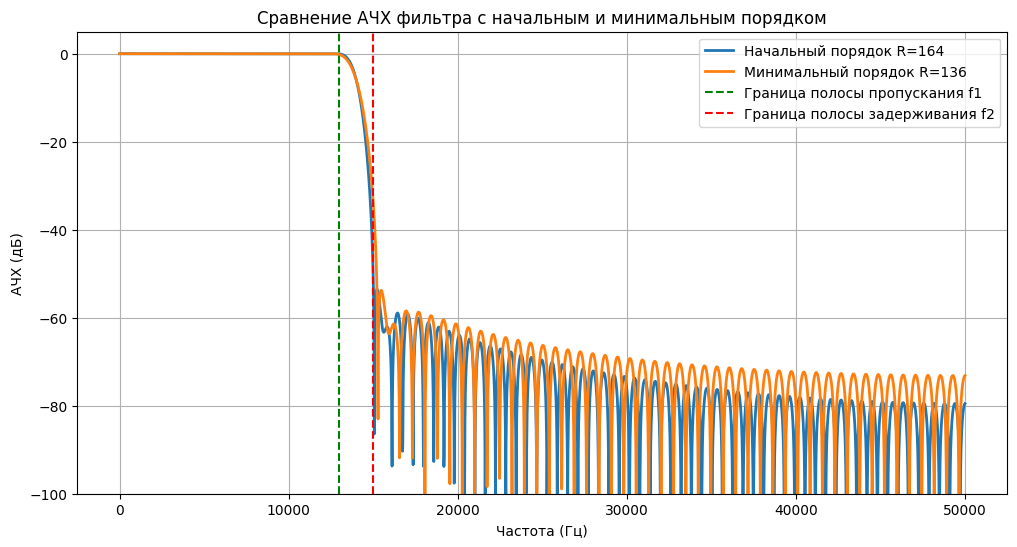

In [32]:
h_initial = signal.firwin(R_hat + 1, fc, window='hamming', fs=fs)
f, H_initial = signal.freqz(h_initial, worN=4096, fs=fs)
f, H_best = signal.freqz(h_best, worN=4096, fs=fs)

plt.figure(figsize=(12,6))
plt.plot(f, 20*np.log10(np.abs(H_initial)), label=f'Начальный порядок R={R_hat}', linewidth=2)
plt.plot(f, 20*np.log10(np.abs(H_best)), label=f'Минимальный порядок R={R_best}', linewidth=2)
plt.axvline(f1, color='green', linestyle='--', label='Граница полосы пропускания f1')
plt.axvline(f2, color='red', linestyle='--', label='Граница полосы задерживания f2')
plt.xlabel('Частота (Гц)')
plt.ylabel('АЧХ (дБ)')
plt.title('Сравнение АЧХ фильтра с начальным и минимальным порядком')
plt.grid(True)
plt.legend()
plt.ylim([-100, 5])
plt.show()

## Задача 2.3. Синтез ФНЧ с окном Кайзера.

Синтезировать КИХ-фильтр нижних частот с окном Кайзера наименьшего порядка при заданных требованиях к АЧХ :
* частота дискретизации $f_s$,
* граничная частота полосы пропускания $f_1$,
* граничная частота полосы задерживания $f_2$,
* максимально допустимое отклонение АЧХ в полосе пропускания $\delta_1$,
* максимально допустимое отклонение АЧХ в полосе задерживания $\delta_2$.

Параметр $\beta$ и длину окна $N$ определить по эмпирическим формулам, приведенным в лекции, или с помощью функции `signal.kaiserord`. Привести график АЧХ получившегося фильтра, сравнить порядок с фильтром из задачи 2.2. 

In [33]:
width = (f2 - f1) / (fs / 2)
ripple_db = -20 * np.log10(min(delta_p, delta_s))
N, beta = signal.kaiserord(ripple=ripple_db, width=width)
if N % 2 == 0:
    N += 1
N, beta

(93, np.float64(2.652339138368929))

In [34]:
def check_requirements(h, fs, f1, f2, delta_p, delta_s):
    freq, H = signal.freqz(h, worN=4096, fs=fs)
    H_abs = np.abs(H)

    passband = H_abs[freq <= f1]
    stopband = H_abs[freq >= f2]

    delta_p_actual = np.max(np.abs(passband - 1))
    delta_s_actual = np.max(stopband)

    meets = (delta_p_actual <= delta_p) and (delta_s_actual <= delta_s)
    return meets, delta_p_actual, delta_s_actual

optimal_N = N

while True:
    h = signal.firwin(N, cutoff=(f1 + f2)/2, window=('kaiser', beta), fs=fs)
    meets, delta_p_actual, delta_s_actual = check_requirements(h, fs, f1, f2, delta_p, delta_s)

    if meets:
        optimal_N = N
        optimal_h = h.copy()
        N -= 2
    else:
        break

optimal_N

93

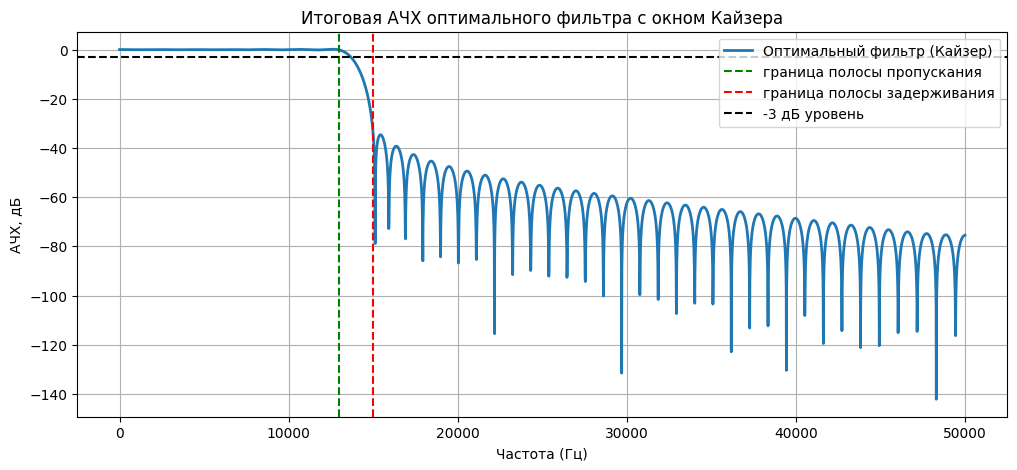

In [35]:
h = signal.firwin(optimal_N, cutoff=(f1 + f2)/2, window=('kaiser', beta), fs=fs)
freq, H_final = signal.freqz(h, worN=4096, fs=fs)

plt.figure(figsize=(12,5))
plt.plot(freq, 20*np.log10(np.abs(H_final) + 1e-12), linewidth=2, label='Оптимальный фильтр (Кайзер)')
plt.axvline(f1, color='g', linestyle='--', label='граница полосы пропускания')
plt.axvline(f2, color='r', linestyle='--', label='граница полосы задерживания')
plt.axhline(-3, color='black', linestyle='--', label='-3 дБ уровень')
plt.xlabel('Частота (Гц)')
plt.ylabel('АЧХ, дБ')
plt.title('Итоговая АЧХ оптимального фильтра с окном Кайзера')
plt.legend()
plt.grid(True)

#  Модуль 3. Оптимизационные методы синтеза КИХ-фильтров

## Задача 3.1. Метод наименьших квадратов.

Синтезировать КИХ-фильтр методом наименьших квадратов наименьшего порядка при заданных требованиях к АЧХ :
* частота дискретизации $f_s$,
* граничная частота полосы пропускания $f_1$,
* граничная частота полосы задерживания $f_2$,
* максимально допустимое отклонение АЧХ в полосе пропускания $\delta_1$,
* максимально допустимое отклонение АЧХ в полосе задерживания $\delta_2$.

Использовать следующую итерационную процедуру:

1) Выбрать начальный порядок фильтра $R$ (например, можно взять результат решения задачи 2.3).

2) Используя функцию `scipy.signal.firls`, синтезировать КИХ-фильтр порядка $R$ методом наименьших квадратов.

3) Проверить выполнение требований к АЧХ фильтра. Если требования не выпоняются, следует увеличить порядок фильтра $R$ (на некоторое целое число) и перейти на п. 2. Если требования выполняются, то нужно уменьшить порядок фильтра  $R$ и перейти на п. 2. Уменьшение и увеличение порядка производится до тех пор, пока не будет найден минимальный порядок , при котором выполняются требования к АЧХ и уменьшение порядка на единицу приводит к нарушению требований к фильтру. 

Приведите график АЧХ КИХ-фильтра минимального порядка $R_\min$ в итерационной процедуре. 

In [36]:
def check_requirements(h, fs, f1, f2, delta_p, delta_s):
    w, H = signal.freqz(h, worN=4096, fs=fs)
    H_abs = np.abs(H)

    passband = H_abs[w <= f1]
    stopband = H_abs[w >= f2]

    delta_p_actual = np.max(np.abs(passband - 1))
    delta_s_actual = np.max(stopband)

    meets = (delta_p_actual <= delta_p) and (delta_s_actual <= delta_s)
    return meets, delta_p_actual, delta_s_actual

bands = [0, f1, f2, fs/2]
desired = [1, 1, 0, 0]

R = 92
R_min = None

found = False

while True:
    h = signal.firls(R+1, bands, desired, fs=fs)
    meets, dp_act, ds_act = check_requirements(h, fs, f1, f2, delta_p, delta_s)

    if meets:
        found = True
        h_best = h.copy()
        R_min = R
        R -= 2
    else:
        if found:
            break
        else:
            R += 2
R_min

112

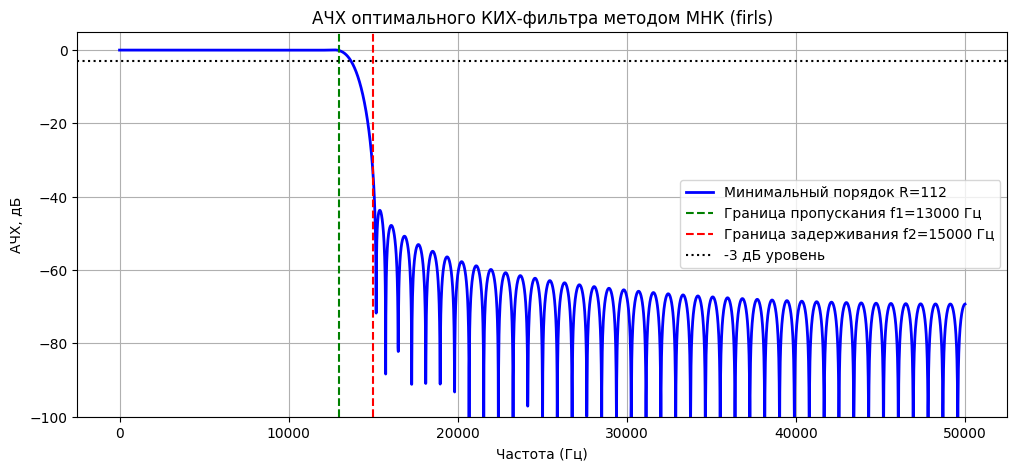

In [37]:
freq, H_final = signal.freqz(h_best, worN=4096, fs=fs)

plt.figure(figsize=(12,5))
plt.plot(freq, 20*np.log10(np.maximum(np.abs(H_final), 1e-10)), 'b', linewidth=2, label=f'Mинимальный порядок R={R_min}')
plt.axvline(f1,color='g',ls='--',label=f'Граница пропускания f1={f1} Гц')
plt.axvline(f2,color='r',ls='--',label=f'Граница задерживания f2={f2} Гц')
plt.axhline(-3, color='black', linestyle=':', label='-3 дБ уровень')
plt.xlabel('Частота (Гц)')
plt.ylabel('АЧХ, дБ')
plt.title('АЧХ оптимального КИХ-фильтра методом МНК (firls)')
plt.grid(True)
plt.ylim([-100,5])
plt.legend()
plt.show()

## Задача 3.2. Метод равномерной чебышевской аппроксимации.

Синтезировать КИХ-фильтр методом равномерной чебышевской аппроксимации наименьшего порядка при заданных требованиях к АЧХ :
* частота дискретизации $f_s$,
* граничная частота полосы пропускания $f_1$,
* граничная частота полосы задерживания $f_2$,
* максимально допустимое отклонение АЧХ в полосе пропускания $\delta_1$,
* максимально допустимое отклонение АЧХ в полосе задерживания $\delta_2$.

Использовать следующую итерационную процедуру:

1) Выбрать начальный порядок фильтра $R$ (например, можно взять результат решения задачи 2.3).

2) Используя функцию `scipy.signal.remez`, синтезировать КИХ-фильтр порядка $R$ методом наименьших квадратов.

3) Проверить выполнение требований к АЧХ фильтра. Если требования не выпоняются, следует увеличить порядок фильтра $R$ (на некоторое целое число) и перейти на п. 2. Если требования выполняются, то нужно уменьшить порядок фильтра  $R$ и перейти на п. 2. Уменьшение и увеличение порядка производится до тех пор, пока не будет найден минимальный порядок , при котором выполняются требования к АЧХ и уменьшение порядка на единицу приводит к нарушению требований к фильтру. 

Приведите график АЧХ КИХ-фильтра минимального порядка $R_\min$ в итерационной процедуре. 

In [38]:
def check_requirements(h, fs, f1, f2, delta_p, delta_s):
    w, H = signal.freqz(h, worN=4096, fs=fs)
    H_abs = np.abs(H)
    
    passband = H_abs[w <= f1]
    stopband = H_abs[w >= f2]
    
    delta_p_actual = np.max(np.abs(passband - 1))
    delta_s_actual = np.max(stopband)
    
    meets_reqs = (delta_p_actual <= delta_p) and (delta_s_actual <= delta_s)
    return meets_reqs, delta_p_actual, delta_s_actual

R = 92
found = False
R_min = None

while True:
    bands = [0, f1, f2, fs/2]
    desired = [1, 0]

    weight = [1/delta_p, 1/delta_s]

    try:
        h = signal.remez(R+1, bands, desired, weight=weight, fs=fs, maxiter=10000)
    except Exception as e:
        print(f"Ошибка синтеза при R={R}: {e}")
        R += 2
        continue
    
    meets_reqs, dp_actual, ds_actual = check_requirements(h, fs, f1, f2, delta_p, delta_s)
    
    if meets_reqs:
        found = True
        h_best = h.copy()
        R_min = R
        R -= 2
        if R < 1:
            break
    else:
        if found:
            break
        else:
            R += 2
R_min

70

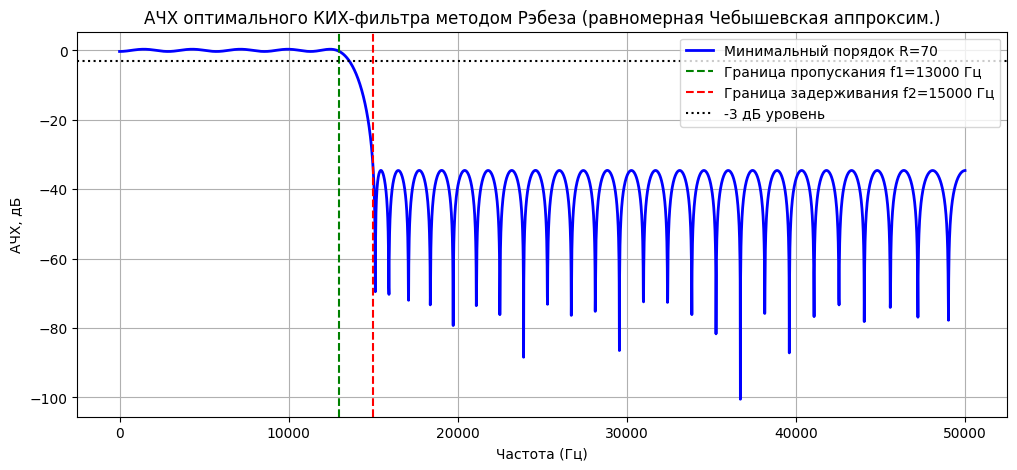

In [39]:
freq, H_final = signal.freqz(h_best, worN=4096, fs=fs)

plt.figure(figsize=(12,5))
plt.plot(freq, 20*np.log10(np.maximum(np.abs(H_final), 1e-10)), 'b', linewidth=2, label=f'Минимальный порядок R={R_min}')
plt.axvline(f1, color='g', linestyle='--', label=f'Граница пропускания f1={f1} Гц')
plt.axvline(f2, color='r', linestyle='--', label=f'Граница задерживания f2={f2} Гц')
plt.axhline(-3, color='black', linestyle=':', label='-3 дБ уровень')

plt.xlabel('Частота (Гц)')
plt.ylabel('АЧХ, дБ')
plt.title('АЧХ оптимального КИХ-фильтра методом Рэбеза (равномерная Чебышевская аппроксим.)')
plt.legend()
plt.grid(True)

## Задача 3.3. Сравнение результатов.

Сравнить минимальные порядки КИХ-фильтров, которые получились в задачах 2.2, 2.3, 3.1 и 3.2. Заполнить таблицу. Определить, будут ли выполняться требование из этих задач для фильтра минимального из получившихся порядков, построенного методом частотной выборки (как в задаче 1.2).


In [40]:
# заполненние таблицы через pandas
import pandas as pd
plot_data = {}
plot_data["Оконный метод (окно Хэмминга)"]  = ["136", "137"]
plot_data["Оконный метод (окно Кайзера)"]    = ["93", "94"]
plot_data["Метод наименьших квадратов"] = ["112", "113"]
plot_data["Метод равномерной чебышевской аппроксимации"] = ["70", "71"]

df3_3 = pd.DataFrame(data=plot_data, columns = plot_data.keys(),
            index=["$$R_\\min$$", "$$N_\\min$$"]).T
# генерировать markdown таблицу 
# print(df3_3.to_markdown())
df3_3

,$$R_\min$$,$$N_\min$$
Оконный метод (окно Хэмминга),136,137
Оконный метод (окно Кайзера),93,94
Метод наименьших квадратов,112,113
Метод равномерной чебышевской аппроксимации,70,71


In [41]:
@np.vectorize
def H_ideal(f):
    if f <= f1 or fs - f1 <= f <= fs:
        return 1
    elif f1 < f < f2:
        return 1 - (f - f1) / (f2 - f1)
    elif fs - f2 < f < fs - f1:
        return 1 - (f - fs + f1) / (f1 - f2)
    else:
        return 0
        
results = {
    'Окно Хэмминга': 137,
    'Окно Казйера': 94,
    'МНК': 113,
    'Равноменая Чебышевская аппроксимация': 71,
}
for name, N in results.items():
    fk = np.arange(N) * fs / N
    Hk = H_ideal(fk)
    hn = np.fft.fftshift(np.fft.ifft(Hk).real)
    f_resp, H_resp = signal.freqz(hn, worN=4096, fs=fs)

    idx_pass = (f_resp <= f1) 
    idx_stop = (f_resp >= f2)
    
    actual_delta_p = np.max(np.abs(abs(H_resp[idx_pass])-1))
    actual_delta_s = np.max(np.abs(H_resp[idx_stop]))

    if actual_delta_p <= delta_p and actual_detla_s <= delta_s:
        print(f'{name} подходит: {actual_delta_p:.4f} <= {delta_p:.4f}; {actual_delta_s:.4f} <= {delta_s:.4f}')
    else:
        print(f'{name} не подходит: {actual_delta_p:.4f} > {delta_p:.4f}; {actual_delta_s:.4f} > {delta_s:.4f}')


Окно Хэмминга не подходит: 0.8220 > 0.0400; 0.0549 > 0.0200
Окно Казйера не подходит: 0.1748 > 0.0400; 0.0811 > 0.0200
МНК не подходит: 0.6970 > 0.0400; 0.0577 > 0.0200
Равноменая Чебышевская аппроксимация не подходит: 0.1844 > 0.0400; 0.1165 > 0.0200


#  Модуль 4. Фильтрация сигнала.

## Задача 4.1. Фильтрация АМ-сигнала, полученного с помощью цифрового осциллографа.
Установить в управляющей программе цифрового осциллографа следующие параметры. 
* Число выборок 1000, режим "Нормально".
* Пробник "х1".
* Частота дискретизации 100 кГц (Время/дел 1mS) или 200 кГц (Время/дел 0,5mS) в соответствии с вариантом задания. 
* Синхронизация "Вкл." и "Авто".
* Генератор: Генератор: режим "АМ/ЧМ", вид "~", диапазон "10K", размах колебания 4В. Частоту генератора выбрать в соответствии с вариантом из таблицы. Установить частоту несущей $f_0$ в соответствии с вариантом задания. 
* Модуляция генератора (меню "Настройки"): режим "АМ", коэффициент модуляции 70%, модулирующая частота 1кГц. 

Выполнить следующую последовательность действий. 
1) Пронаблюдать сигнал с амплитудной модуляцией. 
2) Записать выборки в текстовый файл.
3) Синтезировать КИХ-фильтр одним из рассмотренных методов так, чтобы его АЧХ удовлетворяла условиям задачи. При этом не обязательно использовать фильтр наименьшего возможного порядка. 
4) Провести фильтрацию сигнала. Сравнить сигналы и спектры сигналов до и после фильтрации.
5) Определить групповую задержку фильтра в мс. 
6) Синтезировать БИХ-фильтр Баттерворта, удовлетворяющий тем же требованиям. Сравнить результаты фильтрации сигналов КИХ-фильтром и БИХ-фильтром во временной области.

In [42]:
zero_level = 126
data = pd.read_csv('Vakulenkov.txt', sep='\t')
t = np.array(data['N '] / fs)
sig = np.array(data['Smpl.']) - zero_level

In [43]:
bands = [0, f1, f2, fs/2]
desired = [1, 0]
weight = [1/delta_p, 1/delta_s]

N = 73

h_remez = signal.remez(N, bands, desired, weight=weight, fs=fs)

In [44]:
f, H = signal.freqz(h_remez, worN=4096, fs=fs)
H_dB = 20 * np.log10(np.maximum(abs(H), 1e-10))

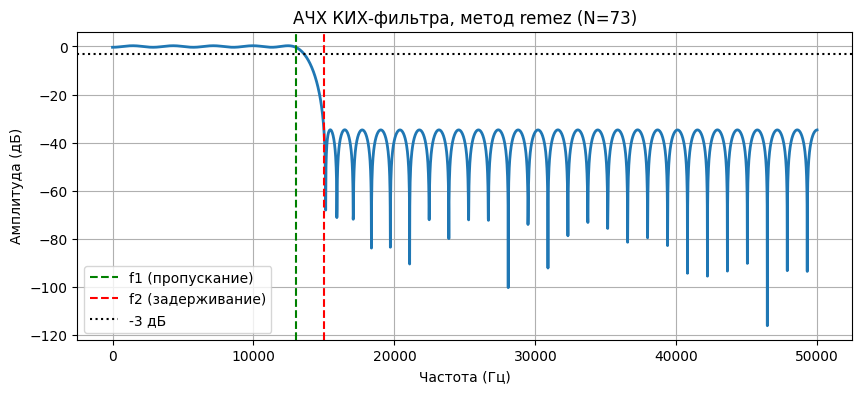

In [45]:
plt.figure(figsize=(10,4))
plt.plot(f, H_dB, linewidth=2)
plt.title('АЧХ КИХ-фильтра, метод remez (N=73)')
plt.xlabel('Частота (Гц)'), plt.ylabel('Амплитуда (дБ)')
plt.axvline(f1, color='g', linestyle='--', label='f1 (пропускание)')
plt.axvline(f2, color='r', linestyle='--', label='f2 (задерживание)')
plt.axhline(-3, color='black', linestyle=':', label='-3 дБ')
plt.legend()
plt.grid()

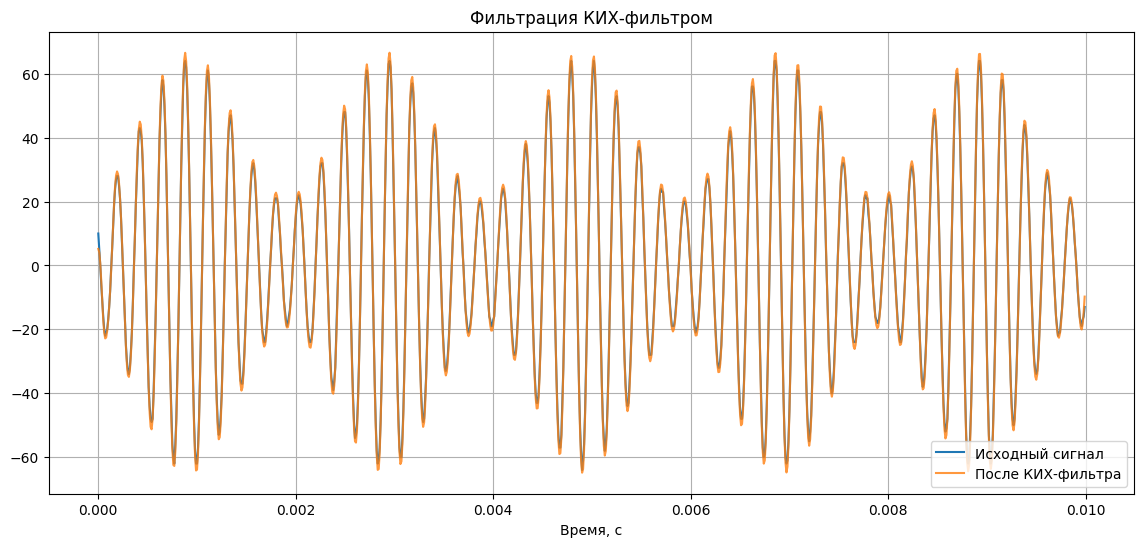

In [46]:
sig_filt_fir = np.convolve(sig, h_remez, mode='same')

plt.figure(figsize=(14,6))
plt.plot(t, sig, label='Исходный сигнал')
plt.plot(t, sig_filt_fir, label='После КИХ-фильтра', alpha=0.8)
plt.xlabel('Время, с')
plt.title('Фильтрация КИХ-фильтром')
plt.legend()
plt.grid()

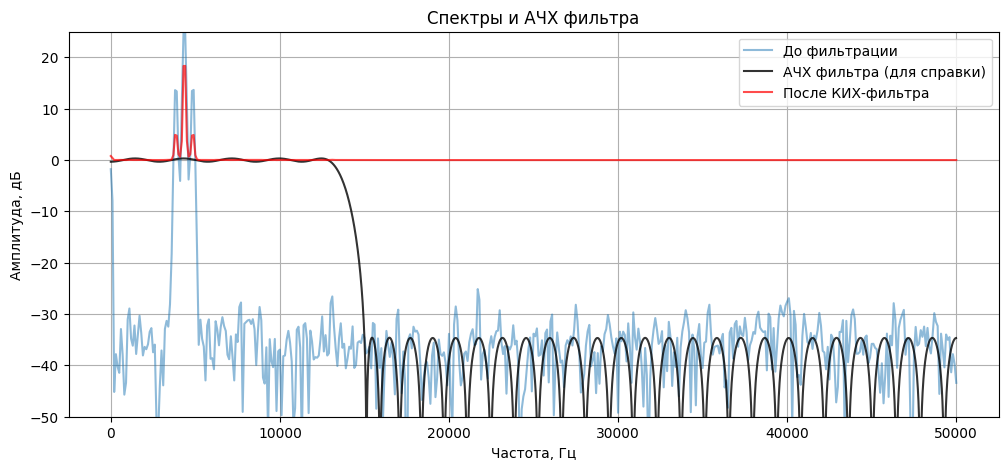

In [47]:
plt.figure(figsize=(12,5))
plt.magnitude_spectrum(sig, Fs=fs, scale='dB', color='C0', alpha=0.5, label='До фильтрации')
plt.plot(f, H_dB, color='k', label='АЧХ фильтра (для справки)', alpha=0.8)
plt.magnitude_spectrum(sig_filt_fir, Fs=fs, color='r', label='После КИХ-фильтра', alpha=0.7)
plt.xlabel('Частота, Гц')
plt.ylabel('Амплитуда, дБ')
plt.ylim([-50, 25])
plt.legend()
plt.title('Спектры и АЧХ фильтра')
plt.grid()

/opt/homebrew/lib/python3.13/site-packages/matplotlib/cbook.py:1709: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/opt/homebrew/lib/python3.13/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


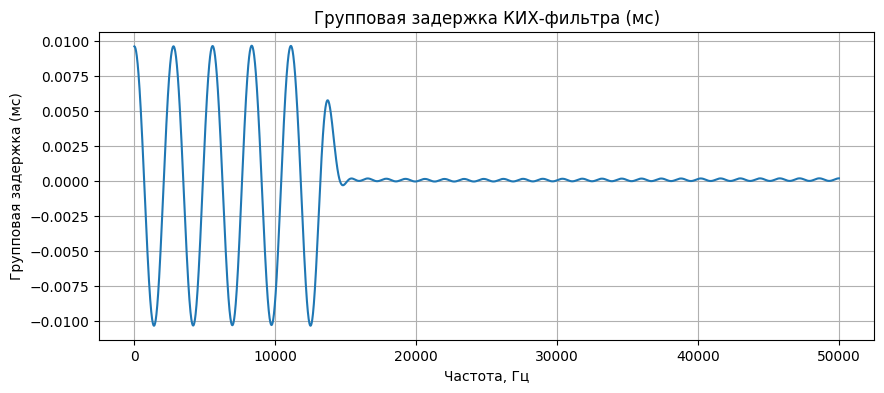

In [48]:
w_gd, gd = signal.freqz(h_remez, worN=4096, fs=fs)
plt.figure(figsize=(10,4))
plt.plot(w_gd, gd/fs*1000)
plt.title('Групповая задержка КИХ-фильтра (мс)')
plt.xlabel('Частота, Гц'); plt.ylabel('Групповая задержка (мс)')
plt.grid(True)

In [49]:
Wp = f1/(fs/2)
Ws = f2/(fs/2)
Rp = -20*np.log10(1 - delta_p)
Rs = -20*np.log10(delta_s)

order, Wn = signal.buttord(Wp, Ws, gpass=Rp, gstop=Rs)
b_butt, a_butt = signal.butter(order, Wn, btype='low')

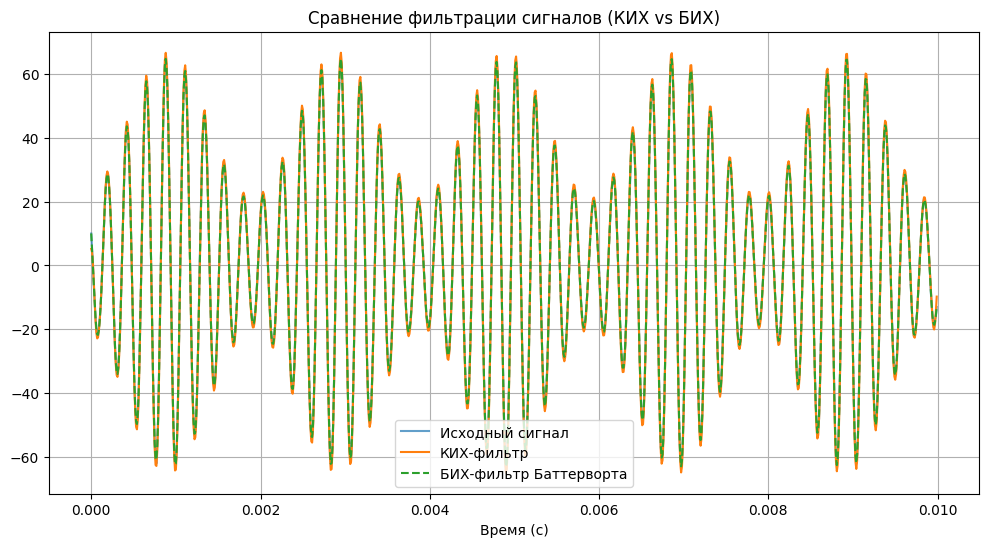

In [50]:
sig_filt_iir = signal.filtfilt(b_butt, a_butt, sig)

plt.figure(figsize=(12,6))
plt.plot(t, sig, label='Исходный сигнал', alpha=0.7)
plt.plot(t, sig_filt_fir, label='КИХ-фильтр', linewidth=1.5)
plt.plot(t, sig_filt_iir, label='БИХ-фильтр Баттерворта', linewidth=1.5, linestyle='--')
plt.title('Сравнение фильтрации сигналов (КИХ vs БИХ)')
plt.xlabel('Время (с)')
plt.legend()
plt.grid()